# Converting CPTECs MERGE files

Author     : MJT (mjt@if.usp.br)

Institution: RCGI / IFUSP

Date       : 18-May-2022

Version    : PA3

- Cleaning code for performance
- Including Poligon for grids

Date       : 05-May-2022

Version    : PA2

- Box to select data only from South America

Date       : 27-Apr-2022

Version    : PA1

- initial version of this code

Cuidados a se tomar com os GRIBs:
1. verificar a latitude e longitude. Caso não estejam no intervalo [-180,180] fazer a transformação
2. Desenhar os polígonos

In [1]:
import os 
import xarray as xr
# import rioxarray as rio
import geopandas as gpd
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# import cartopy.crs as ccrs

In [7]:
# time calculation for benchmarking 

import time
start_time = time.time()

# open GRIB file 

filename = '/home/mapbiomasar/MJT/CPTEC/10/oct2000.grib2'
cptec_file = xr.open_dataset(filename,engine = 'cfgrib')



In [16]:
# extract precipitation, reset index 

cpcp = cptec_file['prec'].to_dataframe()
cpcp = cpcp.reset_index()
cpcp


,time,latitude,longitude,step,surface,valid_time,prec
0,2000-10-01 12:00:00,-60.05,239.95,0 days,0.0,2000-10-01 12:00:00,1.00
1,2000-10-01 12:00:00,-60.05,240.05,0 days,0.0,2000-10-01 12:00:00,0.75
2,2000-10-01 12:00:00,-60.05,240.15,0 days,0.0,2000-10-01 12:00:00,0.75
3,2000-10-01 12:00:00,-60.05,240.25,0 days,0.0,2000-10-01 12:00:00,4.75
4,2000-10-01 12:00:00,-60.05,240.35,0 days,0.0,2000-10-01 12:00:00,4.75
...,...,...,...,...,...,...,...
28672639,2000-10-31 12:00:00,32.25,339.55,0 days,0.0,2000-10-31 12:00:00,0.00
28672640,2000-10-31 12:00:00,32.25,339.65,0 days,0.0,2000-10-31 12:00:00,0.00
28672641,2000-10-31 12:00:00,32.25,339.75,0 days,0.0,2000-10-31 12:00:00,0.00
28672642,2000-10-31 12:00:00,32.25,339.85,0 days,0.0,2000-10-31 12:00:00,0.00


In [ ]:
# agregating (monthly average)



In [40]:
# to avoid excessive processing to shapefiles we define a box
# covering South America

min_lat = -57.5858
max_lat =  15.5988
min_lon = -85.8360
max_lon = -35.8750


# back to original nomenclature
cptec_file = cpcp.copy()

lat_filter = (cptec_file["latitude"] >= min_lat) & (cptec_file["latitude"] <= max_lat)
lon_filter = (cptec_file["longitude"] >= min_lon) & (cptec_file["longitude"] <= max_lon)

# cptec_file = cptec_file.loc[lat_filter & lon_filter]

cptec_file = cptec_file[lat_filter & lon_filter]
cptec_file

,longitude,latitude,time,prec
316957,-85.75,-57.55,2020-07-09 12:00:00,0.125
316958,-85.75,-57.45,2020-07-09 12:00:00,0.125
316959,-85.75,-57.35,2020-07-09 12:00:00,0.125
316960,-85.75,-57.25,2020-07-09 12:00:00,0.125
316961,-85.75,-57.15,2020-07-09 12:00:00,0.125
...,...,...,...,...
777836,-35.95,15.15,2020-07-09 12:00:00,0.375
777837,-35.95,15.25,2020-07-09 12:00:00,0.250
777838,-35.95,15.35,2020-07-09 12:00:00,0.125
777839,-35.95,15.45,2020-07-09 12:00:00,0.250


In [24]:
import geopandas as gpd 
from shapely.geometry import Polygon, Point, MultiPolygon

# converting to geopandas
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(cptec_file['longitude'], cptec_file['latitude'])]

# this will only return the points, not the poligon
points = gpd.GeoDataFrame(cptec_file, 
                          crs = crs, 
                          geometry = geometry)

points

/home/mapbiomasar/miniconda3/envs/geoproc/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,longitude,latitude,time,prec,geometry
224557,-95.75,-57.55,2020-07-09 12:00:00,0.0,POINT (-95.75000 -57.55000)
224558,-95.75,-57.45,2020-07-09 12:00:00,0.0,POINT (-95.75000 -57.45000)
224559,-95.75,-57.35,2020-07-09 12:00:00,0.0,POINT (-95.75000 -57.35000)
224560,-95.75,-57.25,2020-07-09 12:00:00,0.0,POINT (-95.75000 -57.25000)
224561,-95.75,-57.15,2020-07-09 12:00:00,0.0,POINT (-95.75000 -57.15000)
...,...,...,...,...,...
851726,-27.95,12.15,2020-07-09 12:00:00,0.0,POINT (-27.95000 12.15000)
851727,-27.95,12.25,2020-07-09 12:00:00,0.0,POINT (-27.95000 12.25000)
851728,-27.95,12.35,2020-07-09 12:00:00,0.0,POINT (-27.95000 12.35000)
851729,-27.95,12.45,2020-07-09 12:00:00,0.0,POINT (-27.95000 12.45000)


In [13]:
buffers = points.buffer(0.5)
bounds = buffers.bounds

bounds['pixel_area'] = bounds.apply(
  lambda obj: Polygon(shell=[
    Point(obj['maxx'],obj['miny']),
    Point(obj['minx'],obj['miny']),
    Point(obj['minx'],obj['maxy']),
    Point(obj['maxx'],obj['maxy']),
    Point(obj['maxx'],obj['miny']),
  ]),
  axis=1
)
# adding indexes to merge dataframes
points.insert(0, 'New_ID', range(1, 1 + len(points)))
bounds.insert(0, 'New_ID', range(1, 1 + len(bounds)))

my_merge = bounds.merge(points, on='New_ID')
# merge

/tmp/ipykernel_110525/2733126684.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffers = points.buffer(0.5)


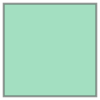

In [14]:
my_merge['pixel_area'][476654]

In [ ]:
merge.pixel_ 

In [ ]:

# # visualization check... passed

# import matplotlib.pyplot as plt

# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# fig, ax = plt.subplots(figsize=(18, 7))


# # ax.set_xlim(178.0, 181.0)
# # ax.set_ylim(20.0, 23.0)
# world.plot(ax=ax, alpha=0.4, color='grey')

# gpd.GeoDataFrame(
#   merge,
#   crs = crs, 
#   geometry = [a for a in merge['pixel_area']]                                
#   ).plot(column='prec', ax=ax, legend=True)



# plt.title('Precipitation')



In [8]:

# new geopandas with the variables of interest
gdf = my_merge.copy()
gdf = gpd.GeoDataFrame(
  gdf,
  crs = crs, 
  geometry = [a for a in gdf['pixel_area']]                               
  )
gdf = gdf.reset_index()
gdf = gdf.loc[:,gdf.columns.isin(['prec', 'geometry'])]

# print('--> TYPE: ',type(gdf))
gdf


/home/mapbiomasar/miniconda3/envs/geoproc/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,prec,geometry
0,0.25,"POLYGON ((-95.25000 -58.05000, -96.25000 -58.0..."
1,0.25,"POLYGON ((-95.25000 -57.95000, -96.25000 -57.9..."
2,0.25,"POLYGON ((-95.25000 -57.85000, -96.25000 -57.8..."
3,0.25,"POLYGON ((-95.25000 -57.75000, -96.25000 -57.7..."
4,0.25,"POLYGON ((-95.25000 -57.65000, -96.25000 -57.6..."
...,...,...
476653,0.00,"POLYGON ((-27.45000 11.65000, -28.45000 11.650..."
476654,0.00,"POLYGON ((-27.45000 11.75000, -28.45000 11.750..."
476655,0.00,"POLYGON ((-27.45000 11.85000, -28.45000 11.850..."
476656,0.00,"POLYGON ((-27.45000 11.95000, -28.45000 11.950..."


In [ ]:


gdf.to_file('tst_precCPTEC.shp')

print('Processing time:', time.time()-start_time)

### Tentando fazer um raster com o gdal para ver se sobe ao GEE

Tentativa 1: cagada!!

In [32]:
import time
start_time = time.time()
from osgeo import gdal
filename = '/home/mapbiomasar/MarcoFranco/MERGE_CPTEC/2020/07/MERGE_CPTEC_20200709.grib2'
dst_filename = 'CPTEC-test0907.tif'
arq1 = gdal.Open (filename)
GT_entrada = arq1.GetGeoTransform()
print(GT_entrada)
save_arq = gdal.Translate(dst_filename,arq1)
print('Raster processing time:', time.time()-start_time)

(-120.10000000000001, 0.1, 0.0, 32.3, 0.0, -0.09999999999999999)
Raster processing time: 0.05518841743469238


Tentativa 2: outra cagada

In [34]:
import time
start_time = time.time()
from osgeo import gdal

filename = '/home/mapbiomasar/MarcoFranco/MERGE_CPTEC/2020/07/MERGE_CPTEC_20200709.grib2'
dst_filename = 'CPTEC-test0907.tiff'
# Open existing dataset
src_ds = gdal.Open(filename)

# Ensure number of bands in GeoTiff will be same as in GRIB file. 
bands = [] # Set up array for gdal.Translate(). 
if src_ds is not None:
    bandNum = src_ds.RasterCount # Get band count
for i in range(bandNum+1): # Update array based on band count
    if (i==0): #gdal starts band counts at 1, not 0 like the Python for loop does.
        pass
    else:
        bands.append(i)

# Open output format driver
out_form= "GTiff"

# Output to new format using gdal.Translate. See https://gdal.org/python/ for osgeo.gdal.Translate options.
dst_ds = gdal.Translate(dst_filename, src_ds, format=out_form, bandList=bands)

# Properly close the datasets to flush to disk
dst_ds = None
src_ds = None

print('Raster processing time:', time.time()-start_time)

Raster processing time: 0.05276226997375488


Tentativa 3 (que funcionou):

Usar o gdal na linha de comando

'''
gdal_translate -b 1 -a_srs EPSG:4326 MERGE_CPTEC_20200709.grib2 -of GTiff MERGE_CPTEC_20200709.tiff

'''